<a href="https://colab.research.google.com/github/sanamsabooni/Thesis_ErrorDetection/blob/main/Thesis_ErrorDetection_leadscrew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os

In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

directory_path = "/content/drive/My Drive/Colab Notebooks"

Mounted at /content/drive


In [3]:
##########################################################################################################################
#start from here if you are not combining .xlsx files

# Replace 'ballscrew_giant_file.csv' with the path
#(this is original ballscrew, the next one is leadscrew)data_b = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ballscrew_giant_file.csv')
data_b = pd.read_csv('/content/drive/My Drive/Colab Notebooks/leadscrew_giant_file.csv')

In [35]:
#Data shape, types, description

print(data_b.shape)
print(data_b.dtypes)
print(data_b.describe())

(3130589, 6)
commanded position      float64
theoretical position    float64
actual position         float64
error actual            float64
error theoretical       float64
time                    float64
dtype: object
       commanded position  theoretical position  actual position  \
count        3.130589e+06          3.130589e+06     3.130589e+06   
mean         8.188550e+01          8.170928e+01     8.189899e+01   
std          8.428358e+01          8.427655e+01     8.429362e+01   
min         -3.125000e-03         -3.057861e-01    -3.000000e-03   
25%          1.969219e+01          1.938416e+01     1.969800e+01   
50%          4.501289e+01          4.500000e+01     4.503300e+01   
75%          1.273500e+02          1.271918e+02     1.273800e+02   
max          3.000000e+02          2.996967e+02     3.000010e+02   

       error actual  error theoretical          time  
count  3.130589e+06       3.130589e+06  3.130589e+06  
mean   1.348925e-02      -1.762195e-01  6.284103e+01  
std

In [4]:
#data preprocessing

# Dropping time and error theoretical columns

for i in range(2):
    data_b.drop(data_b.columns[len(data_b.columns)-1], axis=1, inplace = True)

In [5]:
# rename error actual as error(output)
data_b.rename(columns={'error actual':'error'}, inplace=True)

In [6]:
#printing the head and tail of the table
# plus 2-d instribution
data_b

,commanded position,theoretical position,actual position,error
0,0.000000,0.000000,0.000,0.000000
1,0.000000,-0.303345,0.000,0.000000
2,0.000000,-0.303345,0.000,0.000000
3,0.001563,-0.303345,0.000,-0.001563
4,0.001563,-0.303345,0.000,-0.001563
...,...,...,...,...
3130584,0.003125,0.006714,0.005,0.001875
3130585,0.002344,0.005493,0.004,0.001656
3130586,0.001563,0.004883,0.003,0.001437
3130587,0.000781,0.003662,0.002,0.001219


In [7]:
# Extract the features (X) and target (Y) for ballscrew
X_b = data_b.iloc[:, :-1].values  # Use all columns except the last one as features
Y_b = data_b.iloc[:, -1].values  # Use the last column as the target

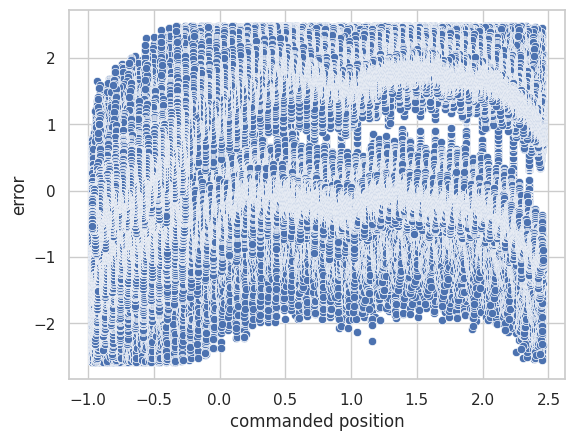

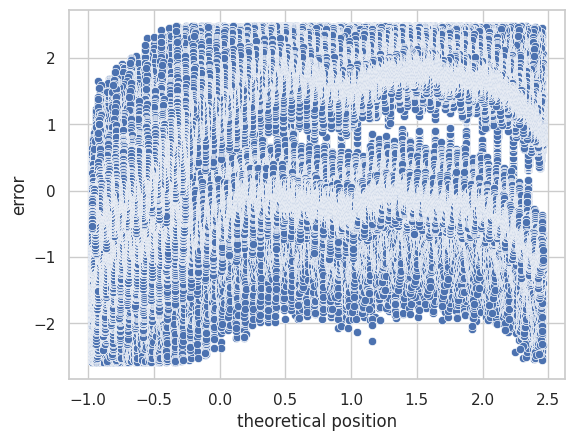

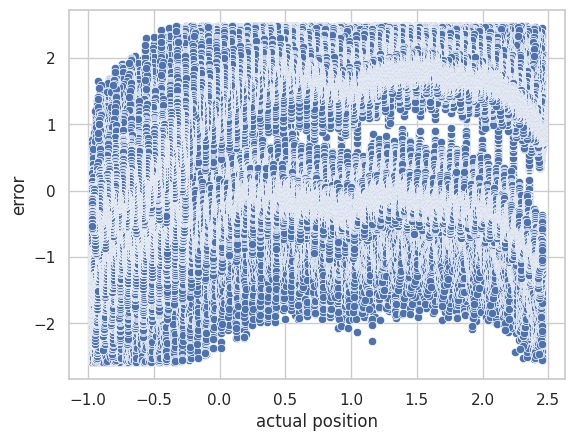

<Figure size 640x480 with 0 Axes>

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn styles for the plots
sns.set_theme(style="whitegrid")

# Scatter plot for each feature against the target variable "error"
# Feature: "commanded position" vs "error"
sns.scatterplot(x=data_b['commanded position'], y=data_b['error'])
plt.show()
plt.savefig(f"/content/drive/My Drive/Colab Notebooks/b_images/01_scatterplot_commanded position_against_error__before_cleaning.jpg")

# Feature: "theoretical position" vs "error"
sns.scatterplot(x=data_b['theoretical position'], y=data_b['error'])
plt.show()
plt.savefig(f"/content/drive/My Drive/Colab Notebooks/b_images/01_scatterplot_theoretical position_against_error__before_cleaning.jpg")

# Feature: "actual position" vs "error"
sns.scatterplot(x=data_b['actual position'], y=data_b['error'])
plt.show()
plt.savefig(f"/content/drive/My Drive/Colab Notebooks/b_images/01_scatterplot_actual position_against_error__before_cleaning.jpg")


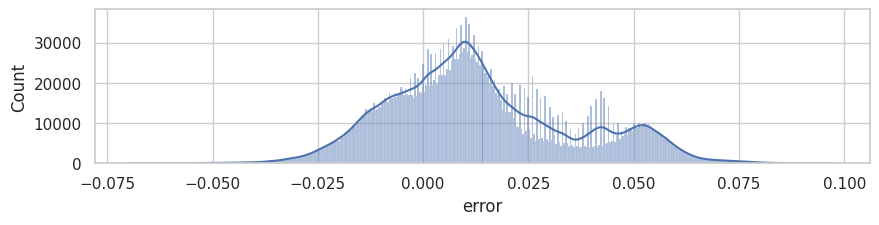

<Figure size 1000x200 with 0 Axes>

In [41]:
#Histogram
sns.histplot(data_b['error'], kde=True)
plt.show()
plt.savefig(f"/content/drive/My Drive/Colab Notebooks/b_images/02_histogram_against_error__before_cleaning.png")

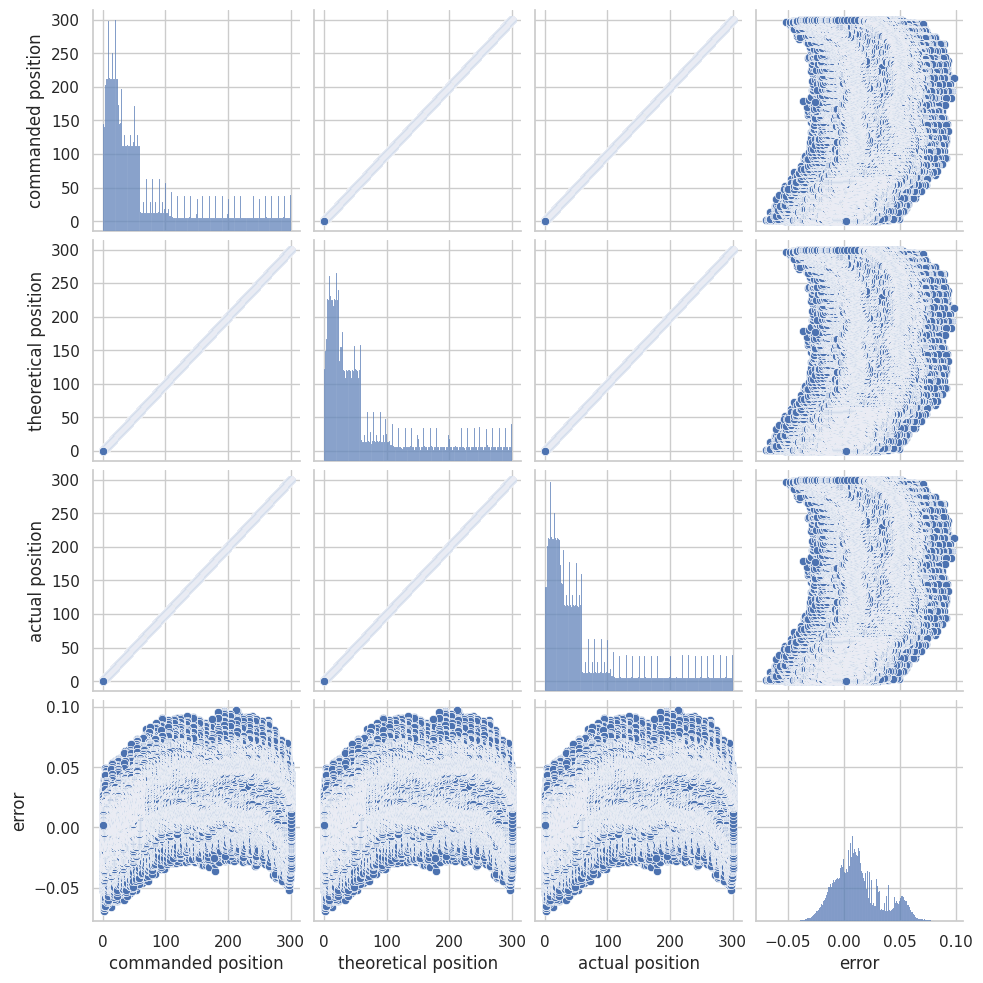

<Figure size 1000x200 with 0 Axes>

In [42]:
# Seaborn Pair Plot
sns.pairplot(data_b)
plt.show()
plt.savefig(f"/content/drive/My Drive/Colab Notebooks/b_images/03_pairplot__before_cleaning.png")

In [8]:
# Checking skewness
check_skew = (data_b.skew(axis=0, skipna=True, numeric_only=True))
print(check_skew)

commanded position      1.162754
theoretical position    1.162877
actual position         1.162478
error                   0.477539
dtype: float64


In [9]:
# Standardization
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
fit = std_scaler.fit(data_b)
output = std_scaler.transform(data_b)
data_b = pd.DataFrame(output, columns=data_b.columns, index=list(data_b.index.values))

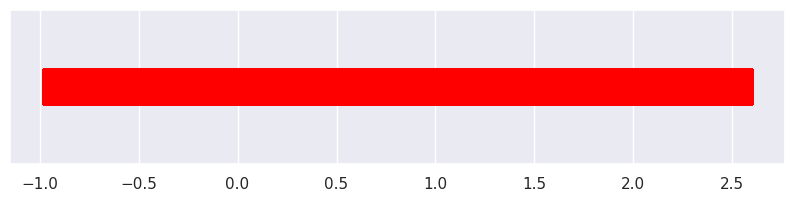

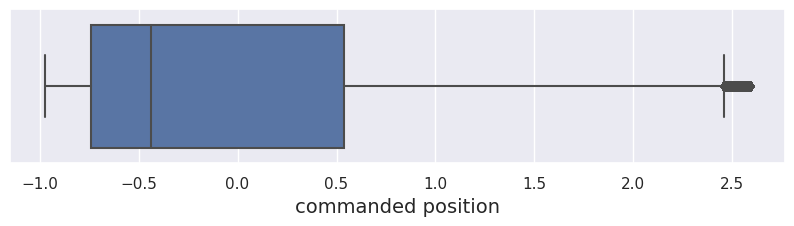

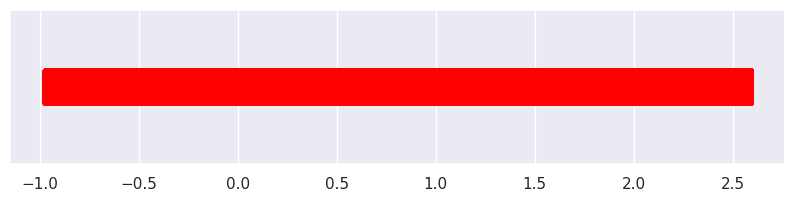

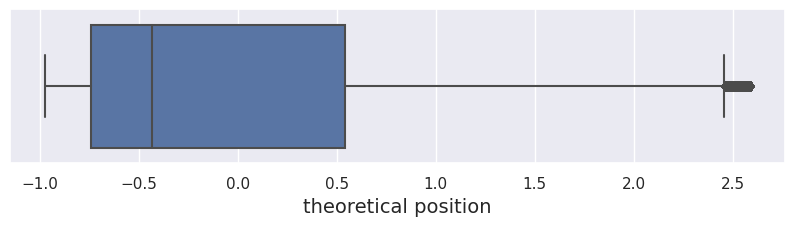

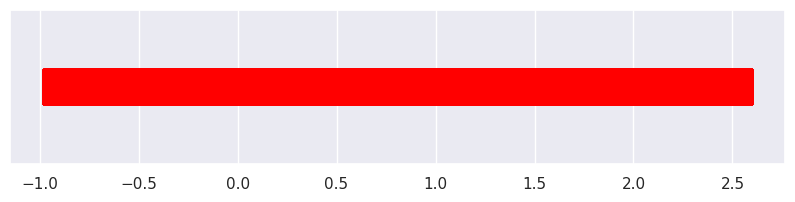

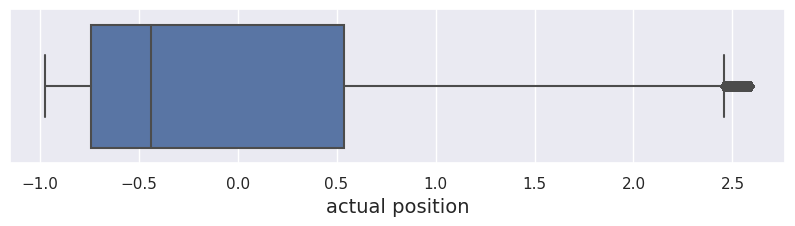

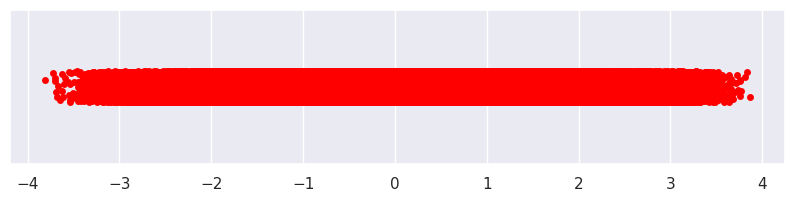

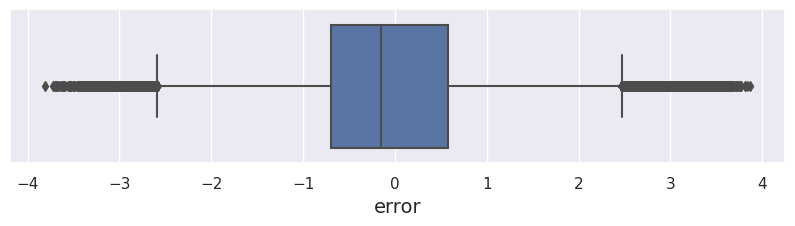

<Figure size 1000x200 with 0 Axes>

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visuallization for outliers by using stripplot & boxplot (Seaborn)
for feature in data_b.columns:
    sns.set(rc={'figure.figsize':(10, 2), "axes.labelsize":14})
    fig = sns.stripplot(data=data_b, x=feature, color='red')
    fig.set(xlabel='')
    plt.show()
    fig = sns.boxplot(data=data_b, x=feature)
    plt.show()
    plt.savefig(f"/content/drive/My Drive/Colab Notebooks/b_images/04_{feature}_before_cleaning.png")
    print('\n')

In [10]:
# Detecting outliers
def detect_outlier(data_b):
    Q1, Q3 = np.percentile(data_b, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    outlier = data_b[((data_b<lower_bound) | (data_b>upper_bound))]
    return outlier

for feature in data_b.columns:
    outlier = detect_outlier(data_b[feature])
    print('Name of column: '+ feature)
    print('Number of outliers: '+ str(len(outlier)))
    print('Max outlier value: '+ str(outlier.max()))
    print('Min outlier value: '+ str(outlier.min()))
    print('\n')

Name of column: commanded position
Number of outliers: 58194
Max outlier value: 2.587865080820004
Min outlier value: 2.4554159973614165


Name of column: theoretical position
Number of outliers: 57337
Max outlier value: 2.5865726882921987
Min outlier value: 2.460390997702182


Name of column: actual position
Number of outliers: 57977
Max outlier value: 2.5874086036060615
Min outlier value: 2.455761613943965


Name of column: error
Number of outliers: 23818
Max outlier value: 3.864115860763296
Min outlier value: -3.80867213528588




In [11]:
def detect_outlier(column):
    """
    Detects outliers in a pandas series and returns their indices.
    """
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return column[(column < lower_bound) | (column > upper_bound)].index

# List to hold indices of rows with outliers
outlier_indices = []

# Detecting outliers in each column and adding their indices to the list
for i in data_b.columns:
    outlier_idx = detect_outlier(data_b[i])
    outlier_indices.extend(outlier_idx)

# Removing duplicates in the list of indices
outlier_indices = list(set(outlier_indices))

# Deleting rows with outliers
data_b = data_b.drop(outlier_indices)


In [12]:
# Checking outliers
for feature in data_b.columns:
    outlier = detect_outlier(data_b[feature])
    print('Name of column: '+ feature)
    print('Number of outliers: '+ str(len(outlier)))
    print('Max outlier value: '+ str(outlier.max()))
    print('Min outlier value: '+ str(outlier.min()))
    print('\n')

Name of column: commanded position
Number of outliers: 134740
Max outlier value: 2261742
Min outlier value: 739281


Name of column: theoretical position
Number of outliers: 135354
Max outlier value: 2261779
Min outlier value: 739278


Name of column: actual position
Number of outliers: 134574
Max outlier value: 2261735
Min outlier value: 739283


Name of column: error
Number of outliers: 6576
Max outlier value: 2193617
Min outlier value: 733045




In [13]:
data_b.shape

(3048649, 4)

In [14]:
# Visuallization by using stripplot & boxplot (Seaborn)
for feature in data_b.columns:
    sns.set(rc={'figure.figsize':(10, 2), "axes.labelsize":14})
    fig = sns.stripplot(data=data_b, x=feature, color='red')
    fig.set(xlabel='')
    plt.show()
    fig = sns.boxplot(data=data_b, x=feature)
    plt.show()

    print('\n')

NameError: ignored

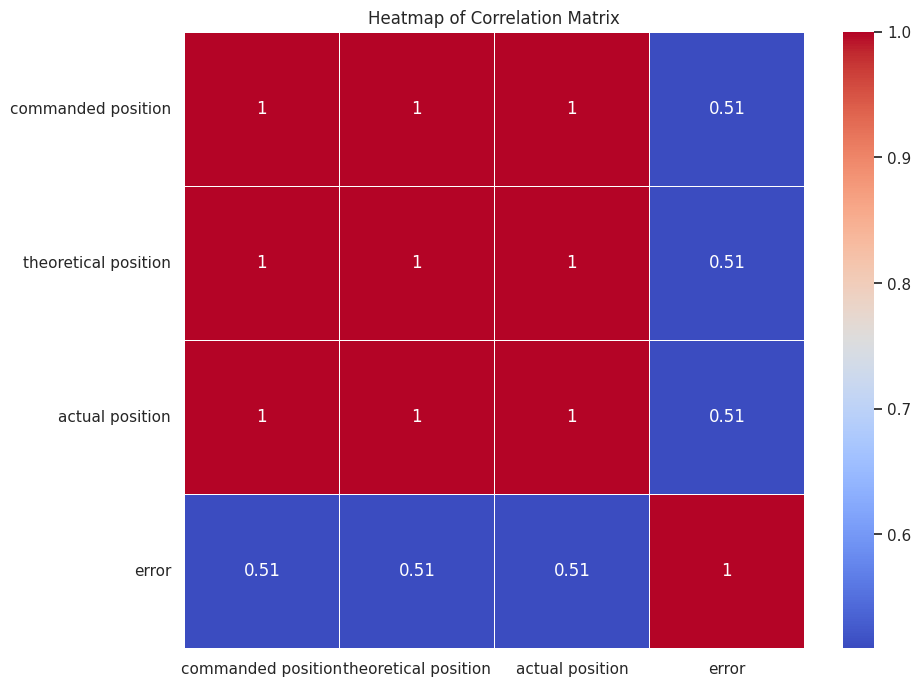

<Figure size 1000x200 with 0 Axes>

In [23]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data_b.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()
plt.savefig(f"/content/drive/My Drive/Colab Notebooks/b_images/06_heatmap_after_cleaning.png")

In [18]:
# Normalize the data
scaler_X_b = MinMaxScaler()
scaler_Y_b = MinMaxScaler()
X_b = scaler_X_b.fit_transform(X_b)
Y_b = scaler_Y_b.fit_transform(Y_b.reshape(-1, 1))

In [19]:
data_b

,commanded position,theoretical position,actual position,error
0,-0.971548,-0.969538,-0.971592,-0.618604
1,-0.971548,-0.973137,-0.971592,-0.618604
2,-0.971548,-0.973137,-0.971592,-0.618604
3,-0.971529,-0.973137,-0.971592,-0.690258
4,-0.971529,-0.973137,-0.971592,-0.690258
...,...,...,...,...
3130584,-0.971511,-0.969458,-0.971533,-0.532618
3130585,-0.971520,-0.969473,-0.971544,-0.542650
3130586,-0.971529,-0.969480,-0.971556,-0.552681
3130587,-0.971538,-0.969494,-0.971568,-0.562713


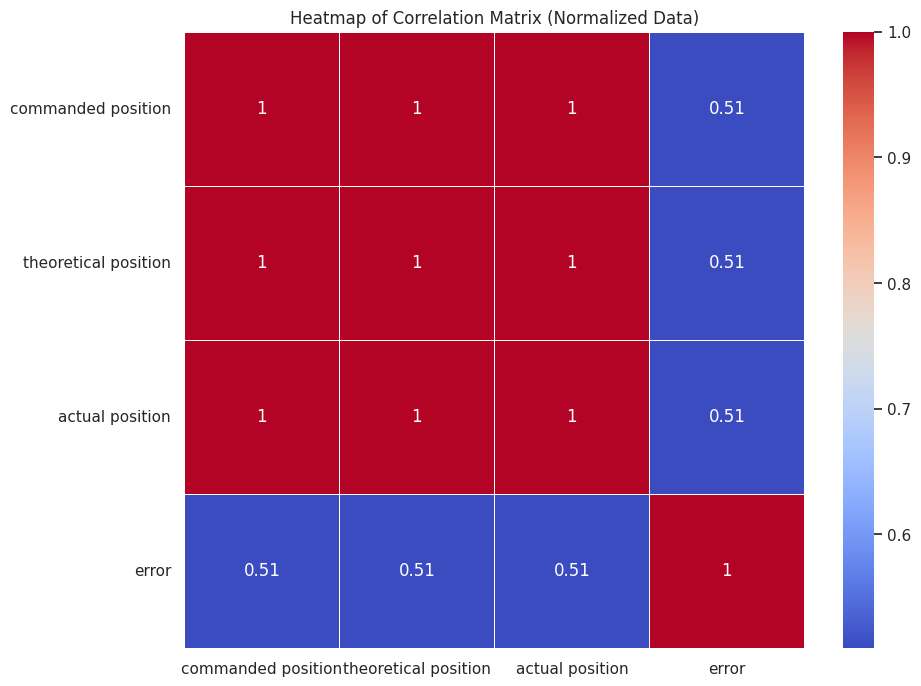

<Figure size 640x480 with 0 Axes>

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features (Note that we are not normalizing the target variable 'error')
data_b_normalized = pd.DataFrame(scaler.fit_transform(data_b.iloc[:, :-1]), columns=data_b.columns[:-1])

# Add the target variable 'error' back into the DataFrame
data_b_normalized['error'] = data_b['error'].values

# Now let's visualize the normalized data with a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix_normalized = data_b_normalized.corr()
sns.heatmap(correlation_matrix_normalized, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix (Normalized Data)')
plt.show()
plt.savefig(f"/content/drive/My Drive/Colab Notebooks/b_images/07_heatmap_after_normalizing.png")


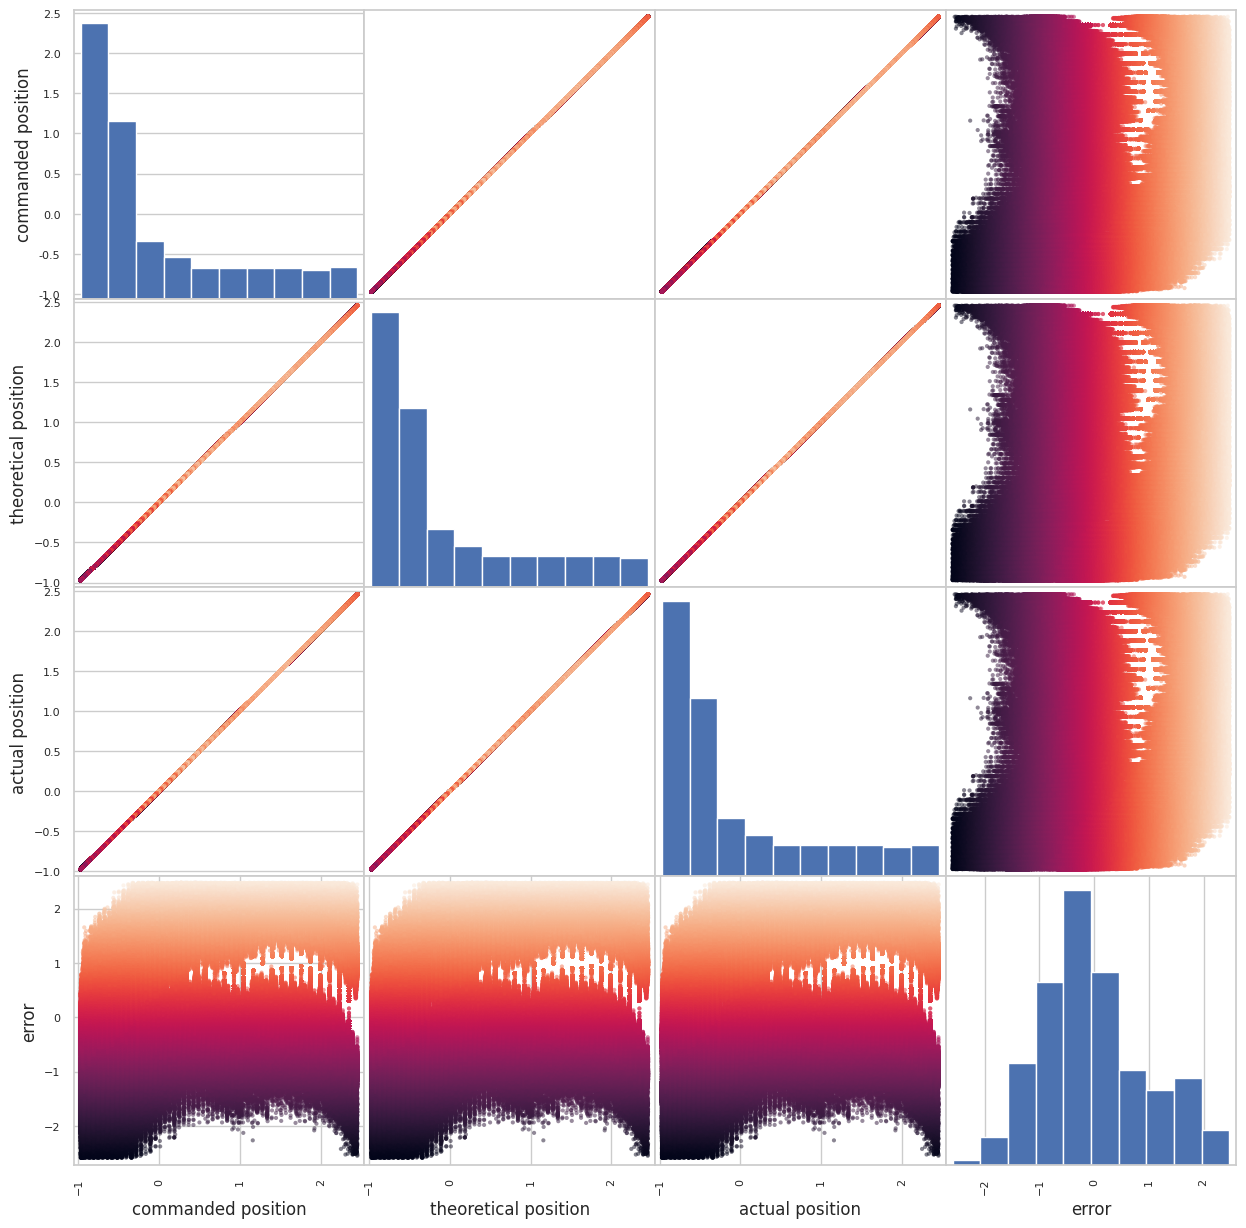

<Figure size 640x480 with 0 Axes>

In [21]:
from pandas.plotting import scatter_matrix
# Visuallization by using stripplot & boxplot (Seaborn)
scatter_matrix(data_b,
               c = data_b['error'],
               alpha=0.5,
               figsize=(15, 15),
               diagonal='hist')
plt.show()
plt.savefig(f"/content/drive/My Drive/Colab Notebooks/b_images/07_scatter_matrix_after_normalizing.png")

In [22]:
# Split data into training and testing sets
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(X_b, Y_b, test_size=0.2, random_state=42)

Epoch 1/4
62612/62612 [==============================] - 243s 4ms/step - loss: 0.0104 - val_loss: 0.0102
Epoch 2/4
62612/62612 [==============================] - 175s 3ms/step - loss: 0.0102 - val_loss: 0.0102
Epoch 3/4
62612/62612 [==============================] - 194s 3ms/step - loss: 0.0102 - val_loss: 0.0102
Epoch 4/4
62612/62612 [==============================] - 173s 3ms/step - loss: 0.0102 - val_loss: 0.0102


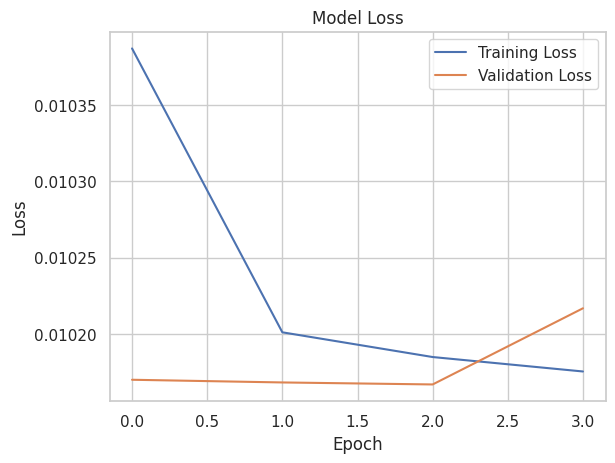

In [24]:
import matplotlib.pyplot as plt

# Define the neural network
model = Sequential()
model.add(Dense(8, input_dim=X_b.shape[1], activation='tanh'))
model.add(Dense(8, activation='tanh'))
#model.add(Dense(8, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='tanh'))  # Assuming it's a regression task with one output

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model and save the history
#epoch 10 was overtraining the model, 8 would be the best
history = model.fit(X_train_b, Y_train_b, epochs=8, batch_size=32, verbose=1, validation_split=0.2)

# Plotting the loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [25]:
# Evaluate the model
MSE_train_b = np.mean(np.square(model.predict(X_train_b) - Y_train_b))
MSE_test_b = np.mean(np.square(model.predict(X_test_b) - Y_test_b))
print('MSE on training data:', MSE_train_b)
print('MSE on testing data:', MSE_test_b)

19567/19567 [==============================] - 34s 2ms/step
MSE on training data: 0.01020515016847039
MSE on testing data: 0.010192467855783201
